In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
from epiweeks import Week
from datetime import datetime, timedelta
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
import numpy as np
from utils import timeseries_formatting, basic_formatting, dec_to_date, hpd, _toYearFraction
from dendropy import TreeList, Tree
import time
import seaborn as sns
import baltic as bt

prop = mpl.font_manager.FontProperties('Roboto')
mpl.rcParams['font.sans-serif'] = prop.get_name()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.size']=16

COLOR = '#343434'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Figure 2: Maximum clade credibility tree
Visualize the output MCC tree from our Bayesian phylogeographic analysis.

Load the tree from file. I use baltic (H/t to @evogytis) because dendropy tends to mangle the tree otherwise. Tree was generated using TreeAnnotator, discarding the first 100 trees as the burn-in.

In [2]:
t = bt.loadNexus( "../data/2022-08-05_exponential_fixed_discrete.mcc.tree" )
t.treeStats()


Tree height: 2.641957
Tree length: 593.521443
strictly bifurcating tree
annotations present

Numbers of objects in tree: 5189 (2594 nodes and 2595 leaves)



Plot the tree, labeling only San Diego, Baja California, and Los Angeles nodes

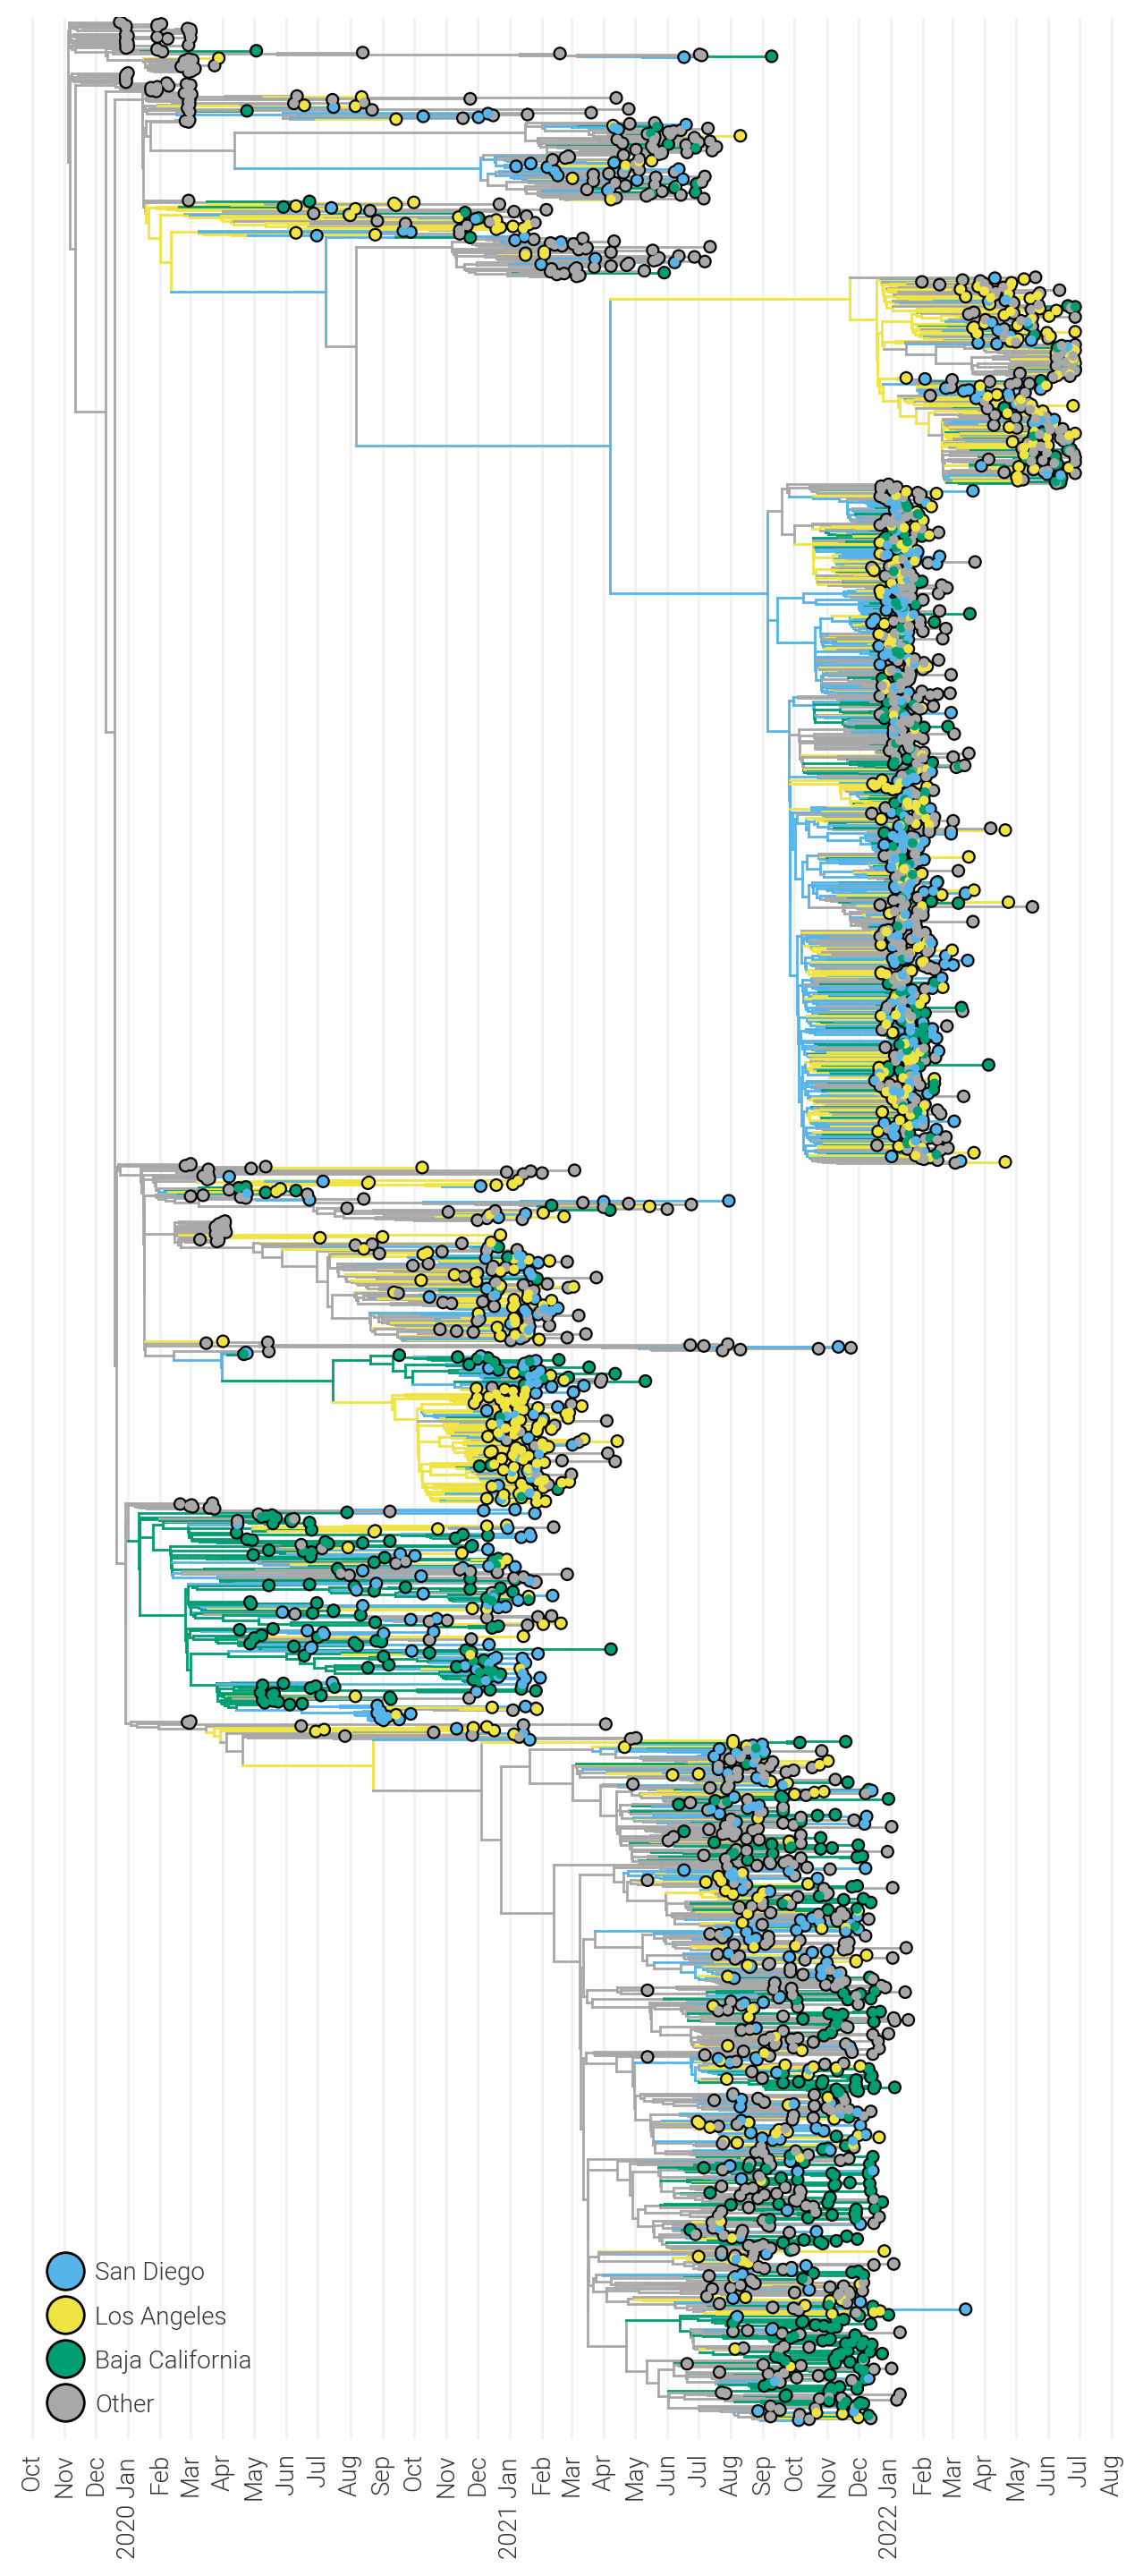

In [4]:
fig, ax = plt.subplots( dpi=200, figsize=(6.5,14.5) )

mpl.rcParams['font.size']=10

cmap = {"San Diego" : "#56B4E9",
        "Los Angeles" : '#F0E442',
        "Baja California" : "#009E73",
        "Other" : "#A8A8A8"}

x_attr = lambda k: mdates.date2num( dec_to_date( k.absoluteTime ) )
c_func = lambda k: cmap.get( k.traits['Location.states'], cmap["Other"] )
t.plotTree( ax, x_attr=x_attr, colour=c_func, linewidth=1 )
t.plotPoints( ax, x_attr=x_attr, size=15, colour=c_func, zorder=100 )
ax.plot()

#ax.set_ylim( -5, 11 )

ax.set_yticks([])
ax.set_yticklabels([])
ax.tick_params( axis="x", bottom=False, which="both", labelbottom=True, rotation=90 )
ax.xaxis.set_major_locator( mdates.YearLocator() )
ax.xaxis.set_major_formatter( mdates.DateFormatter( '%Y %b' ) )
ax.xaxis.set_minor_locator( mdates.MonthLocator() )
ax.xaxis.set_minor_formatter( mdates.DateFormatter( '%b' ) )


ax.grid( which="both", axis="x", linewidth=1, color="#F1F1F1", zorder=1 )
[ax.spines[loc].set_visible(False) for loc in ax.spines]
ax.set_ylim(-20,t.ySpan+5)

legend = [Line2D([0], [0], marker='o', color="w", label='San Diego', markerfacecolor=cmap["San Diego"], markeredgecolor="black", markersize=15),
          Line2D([0], [0], marker='o', color="w", label='Los Angeles', markerfacecolor=cmap["Los Angeles"], markeredgecolor="black", markersize=15),
          Line2D([0], [0], marker='o', color="w", label='Baja California', markerfacecolor=cmap["Baja California"], markeredgecolor="black", markersize=15),
          Line2D([0], [0], marker='o', color="w", label='Other', markerfacecolor=cmap["Other"], markeredgecolor="black", markersize=15)]
ax.legend( loc="lower left", handles=legend, frameon=False, labelspacing=0.8, handletextpad=0.2 )

plt.tight_layout()
plt.savefig( "../analyses/plots/figure2_mcc-discrete-tree.pdf" )
plt.show()